In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [9]:
import datetime

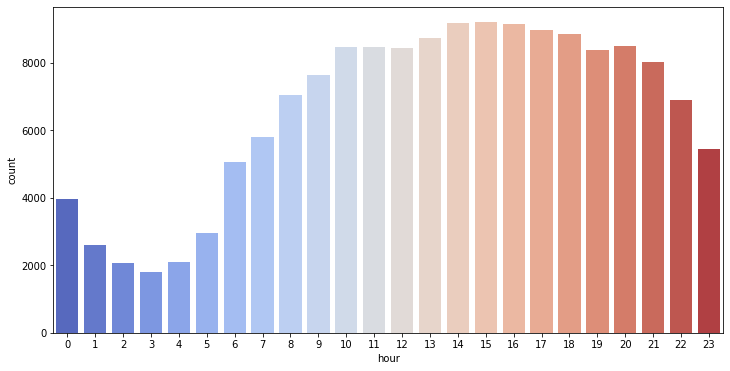

In [51]:
df_label_manual=pd.read_csv('DATA/twitter_label_manual.csv')

In [52]:
df_label_manual

,id_str,created_at,crawled_at,screen_name,is_accident,full_text
0,1113976371515146240,2019-04-05 08:27:18,2020-02-08 12:30:29,mrahmatr7,1,"Rekaman CCTV Kecelakaan Motor di PIK, depan Ta..."
1,1114010329313206272,2019-04-05 10:42:14,2020-02-08 12:30:43,PanritaNews,1,"Tewaskan 346 Orang dalam 2 Kecelakaan, Boss Bo..."
2,1114037478237855745,2019-04-05 12:30:07,2020-02-08 12:30:56,VICE_ID,0,Anggota parlemen Taiwan juga berencana meningk...
3,1114121169873932288,2019-04-05 18:02:40,2020-02-08 12:31:38,OfficialSyariah,0,C.Gerakan.bicara pertolongan pertama pada kece...
4,1114149728323682305,2019-04-05 19:56:09,2020-02-08 12:31:54,AhliAsuransi,0,Asuransi mana nih??\n\nhttps://t.co/AJyABmimcY...
...,...,...,...,...,...,...
997,1241648950509047808,2020-03-22 15:52:33,2020-03-22 16:00:09,akun_b1j4k,0,"""Jatuh cinta itu adalah sebuah kecelakaan yang..."
998,1241721566016073728,2020-03-22 20:41:06,2020-03-22 20:45:09,officialFilza24,0,Pesan nasi goreng depan lapaknya ada kecelakaa...
999,1242306574887968768,2020-03-24 11:25:43,2020-03-24 11:30:10,sekitarbandung_,1,"Hati-hati, Lalin di Tol Purbaleunyi Baros KM 1..."
1000,1242347427262128128,2020-03-24 14:08:03,2020-03-24 14:15:08,ainaizt15,0,korang ada any idea tak macam mana nak bina sa...


In [53]:
df_label_manual = df_label_manual.drop(['id_str','crawled_at'],axis=1)

In [54]:
df_label_manual

,created_at,screen_name,is_accident,full_text
0,2019-04-05 08:27:18,mrahmatr7,1,"Rekaman CCTV Kecelakaan Motor di PIK, depan Ta..."
1,2019-04-05 10:42:14,PanritaNews,1,"Tewaskan 346 Orang dalam 2 Kecelakaan, Boss Bo..."
2,2019-04-05 12:30:07,VICE_ID,0,Anggota parlemen Taiwan juga berencana meningk...
3,2019-04-05 18:02:40,OfficialSyariah,0,C.Gerakan.bicara pertolongan pertama pada kece...
4,2019-04-05 19:56:09,AhliAsuransi,0,Asuransi mana nih??\n\nhttps://t.co/AJyABmimcY...
...,...,...,...,...
997,2020-03-22 15:52:33,akun_b1j4k,0,"""Jatuh cinta itu adalah sebuah kecelakaan yang..."
998,2020-03-22 20:41:06,officialFilza24,0,Pesan nasi goreng depan lapaknya ada kecelakaa...
999,2020-03-24 11:25:43,sekitarbandung_,1,"Hati-hati, Lalin di Tol Purbaleunyi Baros KM 1..."
1000,2020-03-24 14:08:03,ainaizt15,0,korang ada any idea tak macam mana nak bina sa...


In [55]:
#remove url from full_text
import re
df_label_manual['processed_text'] = df_label_manual['full_text'].apply(lambda text: re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE))
df_label_manual['processed_text']

0       Rekaman CCTV Kecelakaan Motor di PIK, depan Ta...
1       Tewaskan 346 Orang dalam 2 Kecelakaan, Boss Bo...
2       Anggota parlemen Taiwan juga berencana meningk...
3       C.Gerakan.bicara pertolongan pertama pada kece...
4       Asuransi mana nih??\n\nPPATK tidak memberikan ...
                              ...                        
997     "Jatuh cinta itu adalah sebuah kecelakaan yang...
998     Pesan nasi goreng depan lapaknya ada kecelakaa...
999     Hati-hati, Lalin di Tol Purbaleunyi Baros KM 1...
1000    korang ada any idea tak macam mana nak bina sa...
1001    "klo takdirnya mati karna corona ya udh lah ma...
Name: processed_text, Length: 1002, dtype: object

In [56]:
#remove number from processed text
df_label_manual['processed_text']=df_label_manual['processed_text'].apply(lambda text: re.sub(r"\d+", "", text))
df_label_manual['processed_text']

0       Rekaman CCTV Kecelakaan Motor di PIK, depan Ta...
1       Tewaskan  Orang dalam  Kecelakaan, Boss Boeing...
2       Anggota parlemen Taiwan juga berencana meningk...
3       C.Gerakan.bicara pertolongan pertama pada kece...
4       Asuransi mana nih??\n\nPPATK tidak memberikan ...
                              ...                        
997     "Jatuh cinta itu adalah sebuah kecelakaan yang...
998     Pesan nasi goreng depan lapaknya ada kecelakaa...
999     Hati-hati, Lalin di Tol Purbaleunyi Baros KM  ...
1000    korang ada any idea tak macam mana nak bina sa...
1001    "klo takdirnya mati karna corona ya udh lah ma...
Name: processed_text, Length: 1002, dtype: object

In [57]:
#remove punctuation
import string
df_label_manual['processed_text']=df_label_manual['processed_text'].apply(lambda text:text.translate(str.maketrans("","",string.punctuation)))
df_label_manual['processed_text']

0       Rekaman CCTV Kecelakaan Motor di PIK depan Tam...
1       Tewaskan  Orang dalam  Kecelakaan Boss Boeing ...
2       Anggota parlemen Taiwan juga berencana meningk...
3       CGerakanbicara pertolongan pertama pada kecela...
4       Asuransi mana nih\n\nPPATK tidak memberikan ri...
                              ...                        
997     Jatuh cinta itu adalah sebuah kecelakaan yang ...
998     Pesan nasi goreng depan lapaknya ada kecelakaa...
999     Hatihati Lalin di Tol Purbaleunyi Baros KM   K...
1000    korang ada any idea tak macam mana nak bina sa...
1001    klo takdirnya mati karna corona ya udh lah mat...
Name: processed_text, Length: 1002, dtype: object

In [58]:
# Stop Words Remove
#import stoword remover class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#create stopword remover
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words() 
stopword = factory.create_stop_word_remover()
df_label_manual['processed_text']=df_label_manual['processed_text'].apply(lambda sentence: stopword.remove(sentence))

In [59]:
df_label_manual['processed_text']

0       Rekaman CCTV Kecelakaan Motor PIK Taman Grisen...
1       Tewaskan  Orang  Kecelakaan Boss Boeing Minta ...
2       Anggota parlemen Taiwan berencana meningkatkan...
3       CGerakanbicara pertolongan kecelakaan PKBAKAT ...
4       Asuransi nih\n\nPPATK rincian darimana partai ...
                              ...                        
997     Jatuh cinta kecelakaan indah alami berulang Ji...
998     Pesan nasi goreng lapaknya kecelakaan\nAuto ke...
999     Hatihati Lalin Tol Purbaleunyi Baros KM   KM  ...
1000    korang any idea nak bina produk mengelakkanmen...
1001    klo takdirnya mati karna corona udh mati aja h...
Name: processed_text, Length: 1002, dtype: object

In [60]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory2 = StemmerFactory()
stemmer = factory2.create_stemmer()
df_label_manual['processed_text']=df_label_manual['processed_text'].apply(lambda sentence:stemmer.stem(sentence))
df_label_manual['processed_text']


0       rekam cctv celaka motor pik taman grisenda vis...
1       tewas orang celaka boss boeing minta maaf http...
2       anggota parlemen taiwan rencana tingkat denda ...
3       cgerakanbicara tolong celaka pkbakat httpstcoj...
4       asuransi nih ppatk rincian darimana partai cal...
                              ...                        
997       jatuh cinta celaka indah alami ulang jika cinta
998           pesan nasi goreng lapak celaka auto kenyang
999     hatihati lalin tol purbaleunyi baros km km ara...
1000    korang any idea nak bina produk mengelakkanmen...
1001    klo takdir mati karna corona udh mati aja hmm ...
Name: processed_text, Length: 1002, dtype: object

In [61]:
# tokenize text to word
import nltk
from nltk.tokenize import word_tokenize 
df_label_manual['tokenize_text']=df_label_manual['processed_text'].apply(lambda text: nltk.tokenize.word_tokenize(text))
df_label_manual['tokenize_text']

0       [rekam, cctv, celaka, motor, pik, taman, grise...
1       [tewas, orang, celaka, boss, boeing, minta, ma...
2       [anggota, parlemen, taiwan, rencana, tingkat, ...
3       [cgerakanbicara, tolong, celaka, pkbakat, http...
4       [asuransi, nih, ppatk, rincian, darimana, part...
                              ...                        
997     [jatuh, cinta, celaka, indah, alami, ulang, ji...
998     [pesan, nasi, goreng, lapak, celaka, auto, ken...
999     [hatihati, lalin, tol, purbaleunyi, baros, km,...
1000    [korang, any, idea, nak, bina, produk, mengela...
1001    [klo, takdir, mati, karna, corona, udh, mati, ...
Name: tokenize_text, Length: 1002, dtype: object

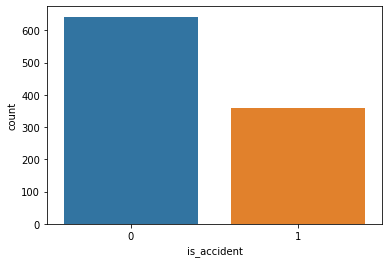

In [62]:
sns.countplot('is_accident',data=df_label_manual)

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df_label_manual['processed_text'])

In [66]:
# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

4812


In [70]:
# transform tweets bag of words
tweets_bow = bow_transformer.transform(df_label_manual['processed_text'])

In [71]:
print('Shape of Sparse Matrix: ', tweets_bow.shape)
print('Amount of Non-Zero occurences: ', tweets_bow.nnz)

Shape of Sparse Matrix:  (1002, 4812)
Amount of Non-Zero occurences:  13730


In [73]:
#transform BOW_matrix to TF_IDF Matrix

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(tweets_bow)

tweets_tfidf = tfidf_transformer.transform(tweets_bow)

In [74]:
#train the model using naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
accident_detect_model = MultinomialNB().fit(tweets_tfidf, df_label_manual['is_accident'])

In [75]:
all_predictions = accident_detect_model.predict(tweets_tfidf)
print(all_predictions)

[1 1 0 ... 1 0 0]


In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(df_label_manual['is_accident'], all_predictions))
print (confusion_matrix(df_label_manual['is_accident'], all_predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       642
           1       0.98      0.94      0.96       360

    accuracy                           0.97      1002
   macro avg       0.97      0.97      0.97      1002
weighted avg       0.97      0.97      0.97      1002

[[635   7]
 [ 20 340]]
